<a href="https://colab.research.google.com/github/GabrielVila/ifood_dev_week/blob/main/Utilizando_a_m%C3%A9trica_NPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 1 - Buscando os dados e aplicando a fórmula do NPS



Nessa aula, tive a oportunidade de aprender sobre a implementação do NPS (Net Promoter Score) utilizando a linguagem Python como suporte. O NPS é uma métrica que mede a satisfação dos clientes, ela é calculada através da diferença dos clientes promotores e detratores, dividido pelo número total de avaliações

Os intervalos de porcentagem correspondentes são os seguintes:

- NPS Excelente – entre 75 e 100

- NPS Muito bom – entre 50 e 74

- NPS Razoável – entre 0 e 49

- NPS Crítico – entre -100 e -1

In [42]:
# Baixar o arquivo CSV do Google Drive da aula e carregar seus dados em um DataFrame pandas.
import gdown
import pandas as pd

file_id = '1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')

base = pd.read_csv('/content/feedbacks.csv', delimiter=";")

Downloading...
From: https://drive.google.com/uc?id=1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi
To: /content/feedbacks.csv
100%|██████████| 351/351 [00:00<00:00, 721kB/s]


In [43]:
# TODO: Implementar a lógica de NPS em comandos simples e sequenciais (imperativo).

detratores = 0
promotores = 0

notas = base['nota']

for nota in notas:
  if nota >= 9:
    promotores += 1
  elif nota <= 6:
    detratores += 1

nps = (promotores - detratores) / len(notas) * 100
print(nps)


57.14285714285714


In [44]:
# TODO: Evoluir a implementação para separar melhor as responsabilidades (funcional).

def calcular_nps(notas):
  detratores = 0
  promotores = 0

  for nota in notas:
    if nota >= 9:
      promotores += 1
    elif nota <= 6:
      detratores += 1

  nps = (promotores - detratores) / len(notas) * 100
  return nps


notas = base['nota']


print(calcular_nps(notas))


57.14285714285714


In [45]:
# TODO: Abstrair o problema usando classes e objetos (orientação a objetos)

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadosFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    detratores = notas[notas <= 6].count()
    promotores = notas[notas >= 9].count()

    return (promotores - detratores) / len(self.feedbacks) * 100




feedbacks = [Feedback(linha['nota'], linha['comentario']) for i, linha in base.iterrows()]

analisador = AnalisadosFeedback(feedbacks)
nps = analisador.calcular_nps()
nps

57.14285714285714

Aula 2 - Visualização gráfica dos dados



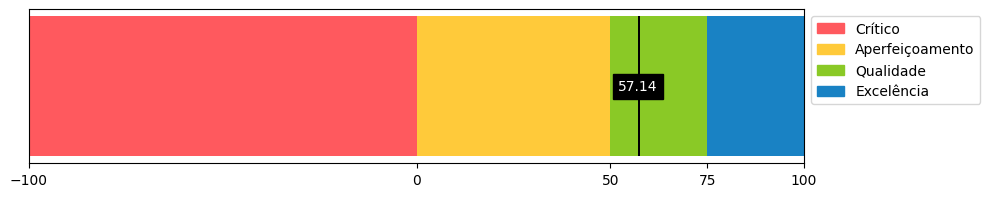

In [52]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

# TODO: Criar um gráfico usando "matplotlib" para visualizar o NPS que calculamos

def criar_grafico_nps(nps):
  fig, ax = plt.subplots(figsize=(10,2))

  for i, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width= NPS_VALORES[i + 1] - NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

  ax.barh([0], width = 0.5, left = nps, color='black')
  ax.set_yticks([])
  ax.set_xlim(-100, 100)
  ax.set_xticks(NPS_VALORES)

  plt.text(nps, 0, f'{nps:.2f}', ha='center', va='center', color='white', bbox=dict(facecolor ='black'))

  patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1))

  plt.show()

criar_grafico_nps(nps)